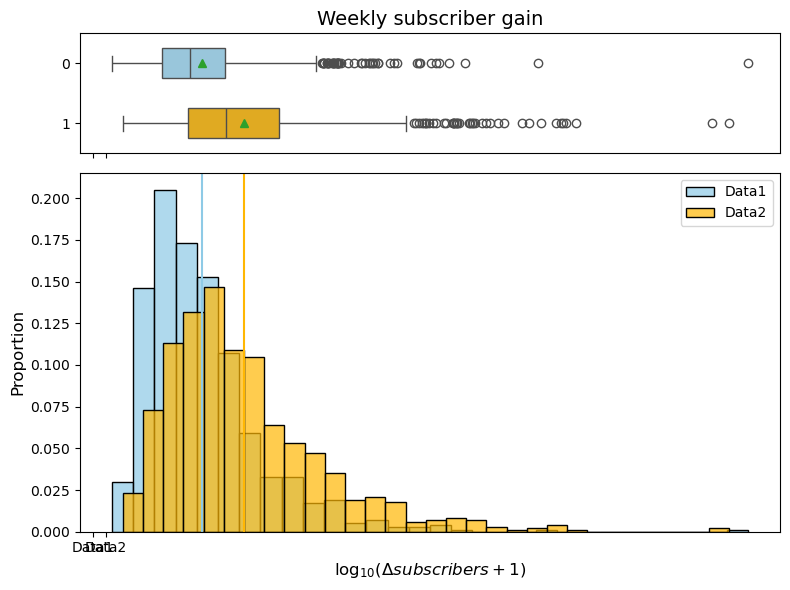

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exemple de données
np.random.seed(42)
data1 = np.random.lognormal(mean=2, sigma=0.5, size=1000)
data2 = np.random.lognormal(mean=2.3, sigma=0.5, size=1000)

mean1 = data1.mean()
mean2 = data2.mean()

# Création de la figure avec deux subplots superposés
fig, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={"height_ratios": [1, 3]},
    figsize=(8, 6)
)

# Boxplots distincts sur l'axe supérieur
sns.boxplot(data=[data1, data2], ax=ax_box, palette=["#8ecae6", "#ffb703"], width=0.5, orient='h', showmeans=True)
ax_box.set_xticks([0, 1])  # Position des boxplots
ax_box.set_xticklabels(["Data1", "Data2"], fontsize=10)
ax_box.set_title("Weekly subscriber gain", fontsize=14)

# Histogrammes superposés sur l'axe inférieur
sns.histplot(data1, ax=ax_hist, kde=False, color='#8ecae6', stat='probability', bins=30, alpha=0.7, label="Data1")
ax_hist.axvline(mean1, color='#8ecae6')
sns.histplot(data2, ax=ax_hist, kde=False, color='#ffb703', stat='probability', bins=30, alpha=0.7, label="Data2")
ax_hist.axvline(mean2, color='#ffb703')
ax_hist.set_xlabel(r'log$_{10}(\Delta subscribers + 1)$', fontsize=12)
ax_hist.set_ylabel('Proportion', fontsize=12)
ax_hist.legend(loc="upper right")

# Ajustement des espacements entre les subplots
plt.tight_layout()

plt.show()


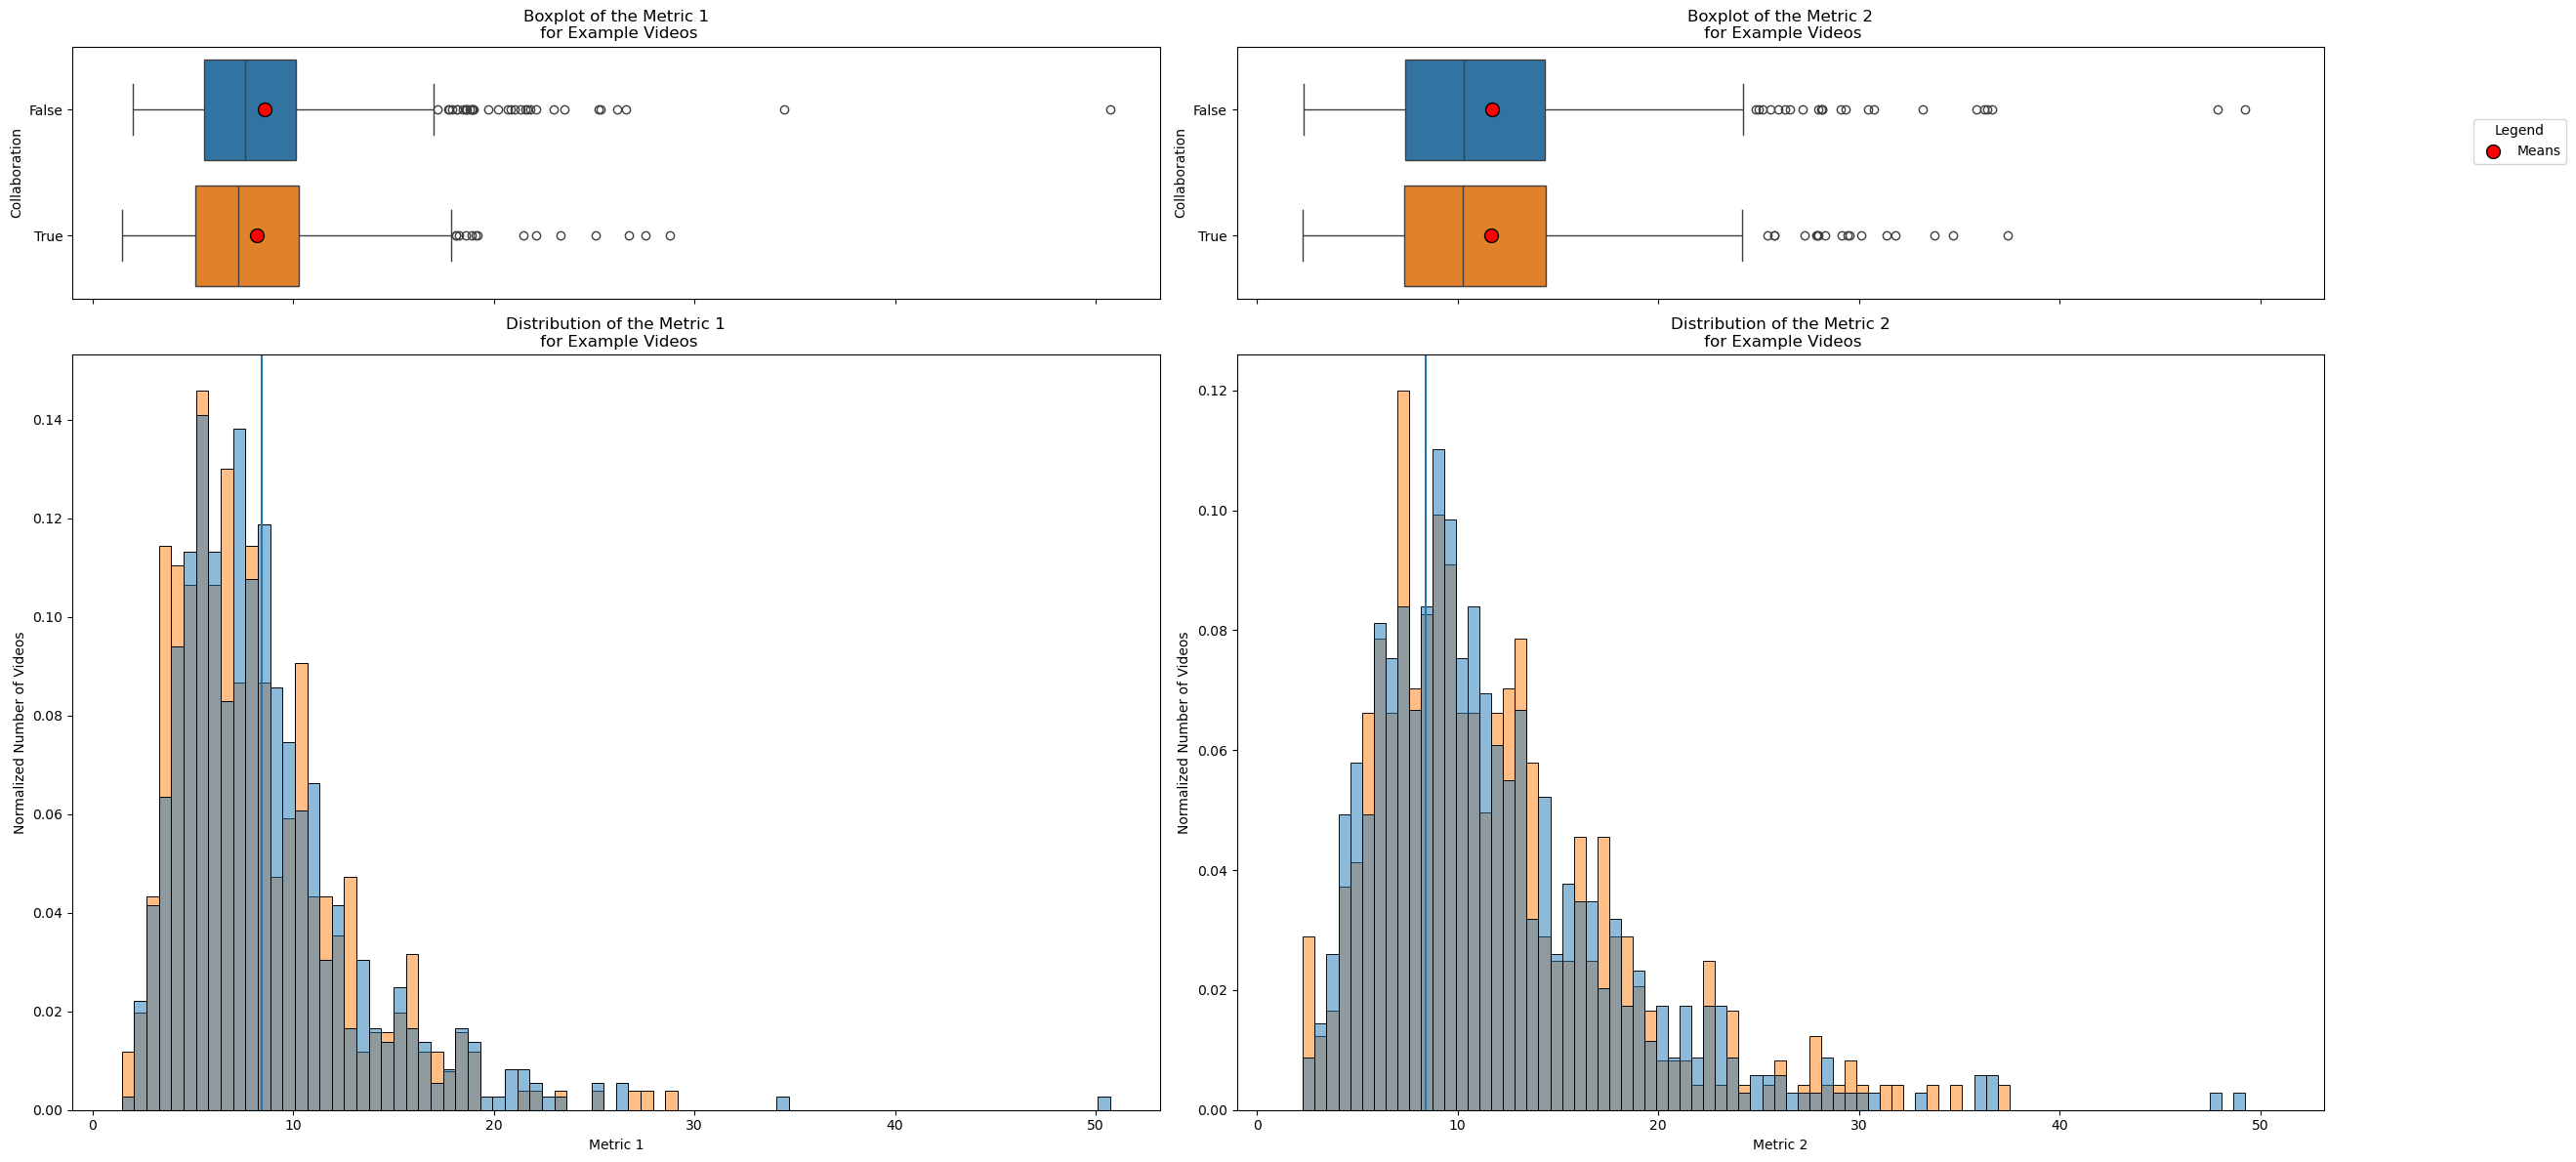

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np

# Création de données d'exemple
np.random.seed(42)
data = pd.DataFrame({
    'metric1': np.random.lognormal(mean=2, sigma=0.5, size=1000),
    'metric2': np.random.lognormal(mean=2.3, sigma=0.5, size=1000),
    'collab': np.random.choice([True, False], size=1000, p=[0.4, 0.6])
})

mean1 = data['metric1'].mean()

# Configuration des colonnes et autres paramètres
columns = ['metric1', 'metric2']
x_logs = [False, False]
y_logs = [False, False]
custom_labels = {'metric1': 'Metric 1', 'metric2': 'Metric 2'}
category = 'Example'
save = False

# Histogrammes et boxplots combinés
fig, axes = plt.subplots(2, len(columns), figsize=(12 * len(columns), 12), 
                         gridspec_kw={'height_ratios': [1, 3]}, sharex=True)

for i, (col, x_log, y_log) in enumerate(zip(columns, x_logs, y_logs)):
    # Histogrammes dans les axes du bas
    sns.histplot(
        data=data,
        x=col,
        hue="collab",
        hue_order=[False, True],
        bins=80,
        common_norm=False,
        fill=True,
        stat="density",
        ax=axes[1, i],  # Axe inférieur (histogramme)
        log_scale=x_log,
        legend=False
    )
    axes[1, i].set_xlabel(custom_labels[col])
    axes[1, i].set_ylabel("Normalized Number of Videos")
    axes[1, i].axvline(mean1)
    axes[1, i].set_title(f"Distribution of the {custom_labels[col]}\n for {category} Videos")
    if y_log:
        axes[1, i].set_yscale("log")
    
    # Boxplots horizontaux dans les axes du haut
    sns.boxplot(
        data=data,
        x=col,
        y="collab",
        hue="collab",
        ax=axes[0, i],  # Axe supérieur (boxplot)
        orient="h",
        showmeans=True,
        meanprops={'marker': 'o', 'markeredgecolor': 'black', 'markersize': 10, 'markerfacecolor': 'red'},
        showfliers=True  # Décommenter pour afficher les outliers
    )
    axes[0, i].set_xlabel("")
    axes[0, i].set_ylabel("Collaboration")
    axes[0, i].set_title(f"Boxplot of the {custom_labels[col]}\n for {category} Videos")
    axes[0, i].legend_.remove()  # Supprime la légende des boxplots pour éviter les doublons

# Légende unique pour les histogrammes et les boxplots
mean_marker = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markeredgecolor='black', markersize=10,
                     label='Means')
fig.legend(
    handles=[mean_marker],
    loc='upper right',
    bbox_to_anchor=(1.1, 0.9),
    title="Legend"
)

plt.tight_layout()
plt.show()
